In [12]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from impyute.imputation.cs import em
from Multivariate_EM import impute_em
warnings.filterwarnings('ignore')

In [13]:
funda_data = pd.read_csv('Fundamental_data.csv')
flow_data = funda_data.loc[:,['public_date','pcf','PEG_trailing','TICKER']]
funda_data = funda_data.drop(columns=['qdate',"pcf",'staff_sale','PEG_trailing','gvkey','permno','adate'])
funda_data = funda_data.drop_duplicates()
stock_list = ['AAPL','AMZN','BRK-B','GOOG','JNJ','META','MSFT','NVDA','TSLA','V']

In [16]:
def merge_left(funda_stock,name,flow_data,freq):
    price = pd.read_csv('../stock_price/'+freq+'/'+name+'.csv')
    price['Date'] = price.Date.apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
    close = price.loc[:,['Date']]
    funda_stock = pd.merge(flow_data,funda_stock,how='outer',on = ['public_date'])
    df = pd.merge(funda_stock,close,how='right',left_on=['public_date'],right_on=['Date'])
# Here we merge the dataset together using the forward filling method, which is using the old time data to fill the later time.
    df.set_index('Date',inplace=True)
    df.drop(columns=['TICKER_x','TICKER_y','public_date'],inplace=True)
    imputed_value = impute_em(df.values)
    newdf = pd.DataFrame(imputed_value['X_imputed'],columns=df.columns,index=df.index)
    print(newdf)
    newdf.to_csv('FundaIndicators/'+freq+'/'+name+'.csv')

In [17]:
for name in pd.unique(funda_data.TICKER).tolist():
    funda_stock = funda_data.loc[funda_data.TICKER==name,:]
    funda_stock['public_date'] = funda_data.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    flow_stock = flow_data.loc[flow_data.TICKER==name,:]
    flow_stock['public_date'] = flow_stock.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    if name == 'FB':
        name = 'META'
    elif name == 'BRK':
        name = 'BRK-B'
    elif name == 'GOOGL':
        name = 'GOOG'
    print(name)
    merge_left(funda_stock,name,flow_stock,'Daily')
    print(1)
    merge_left(funda_stock,name,flow_stock,'Weekly')
    print(2)
    merge_left(funda_stock,name,flow_stock,'Monthly')
    print(3)

MSFT
                  pcf  PEG_trailing       dpr       npm       gpm       roa  \
Date                                                                          
2020-01-31  24.735000      0.663000  0.343000  0.317000  0.757000  0.216000   
2020-01-30  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2020-01-29  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2020-01-28  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2020-01-27  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
...               ...           ...       ...       ...       ...       ...   
2010-01-08  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2010-01-07  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2010-01-06  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2010-01-05  12.774671     14.374665  0.477306  0.241659  0.762612  0.229882   
2010-01-04  12.774671     14.374665  0.477306  

LinAlgError: Singular matrix

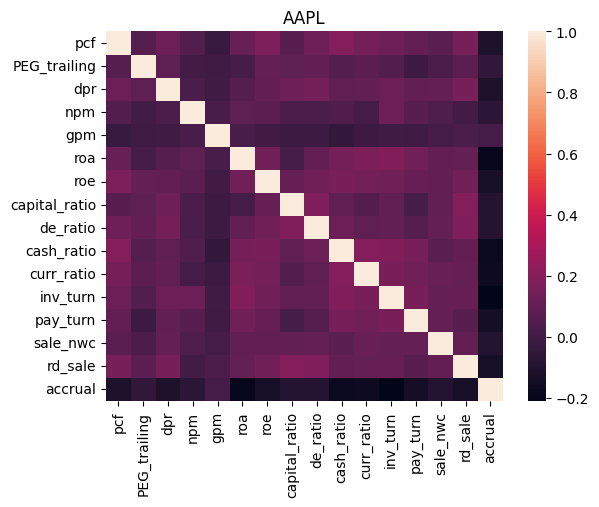

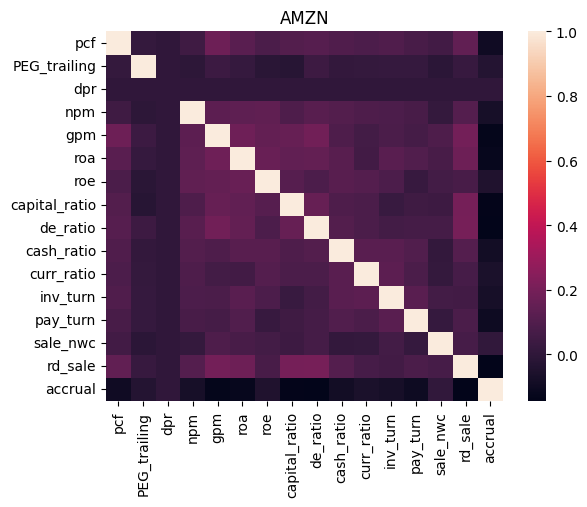

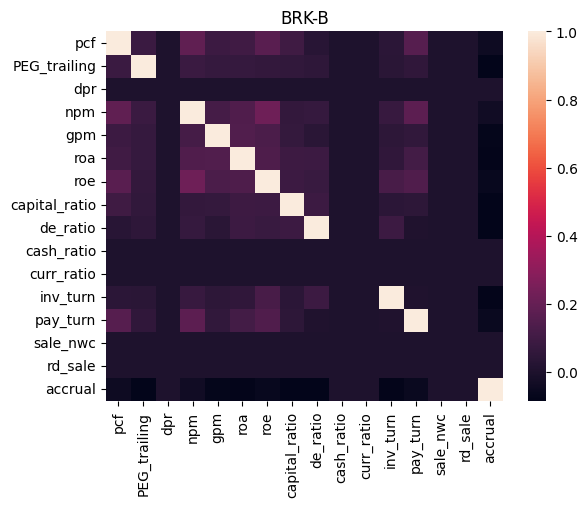

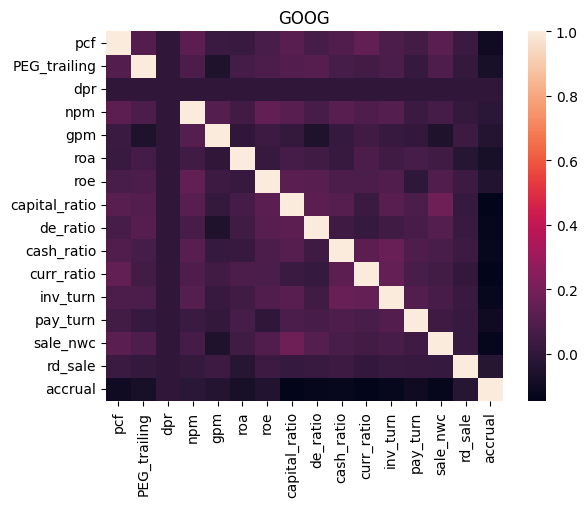

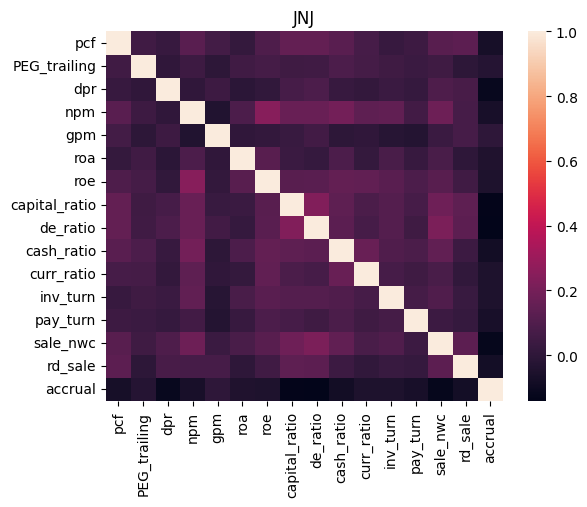

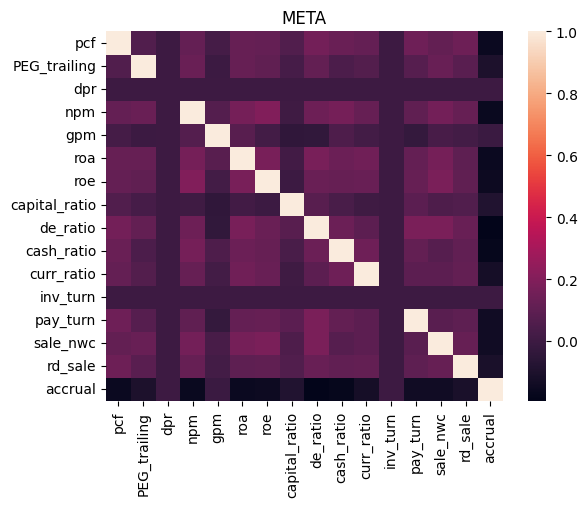

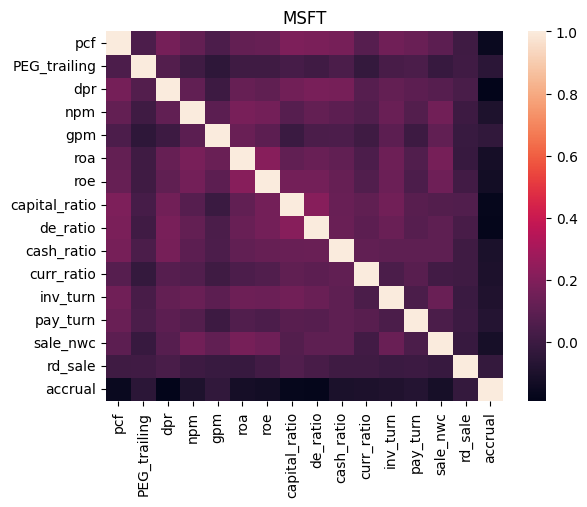

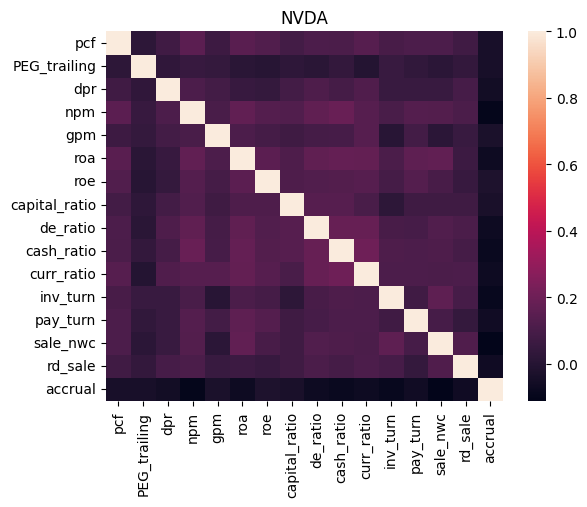

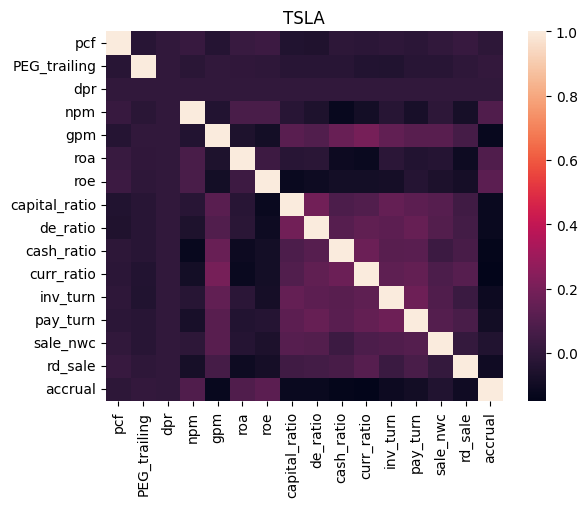

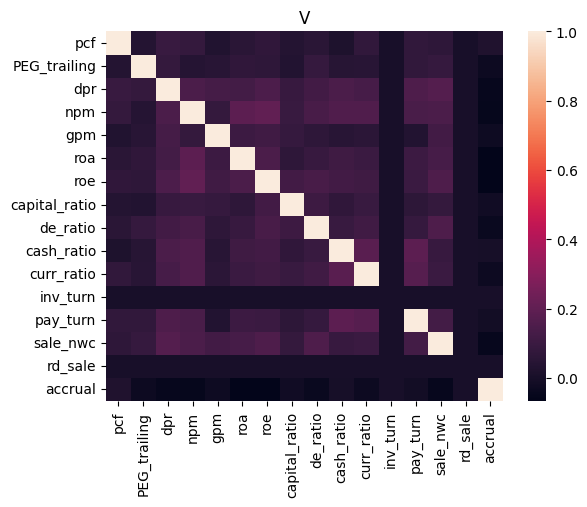

In [57]:
freq = 'Daily'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()

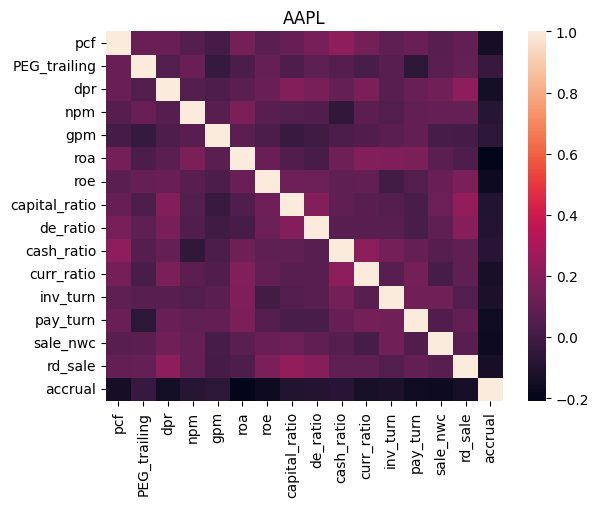

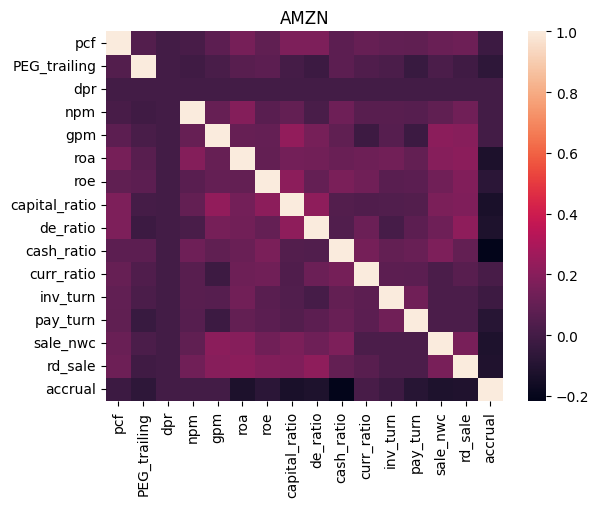

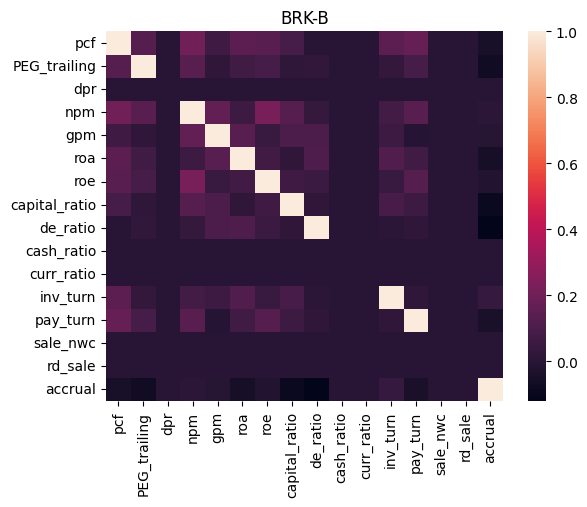

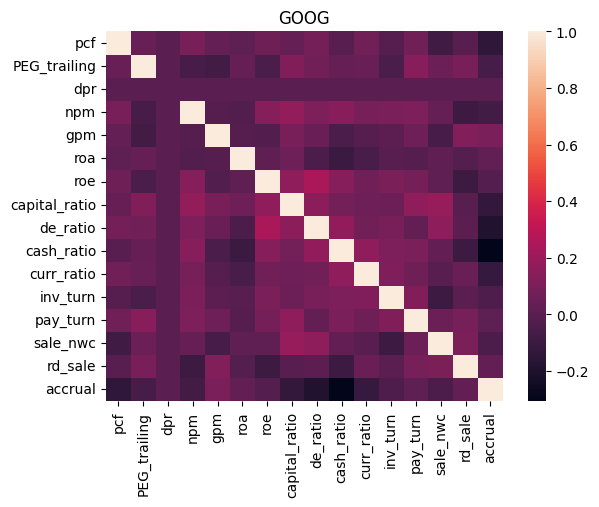

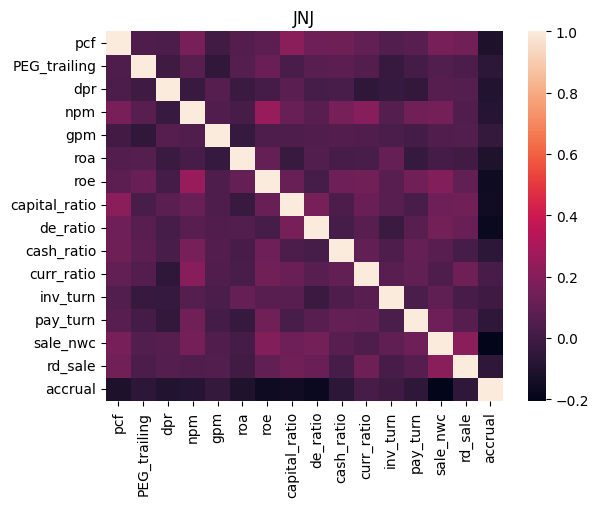

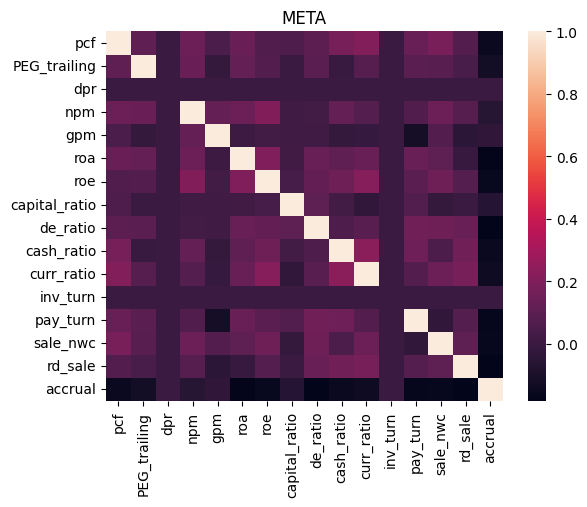

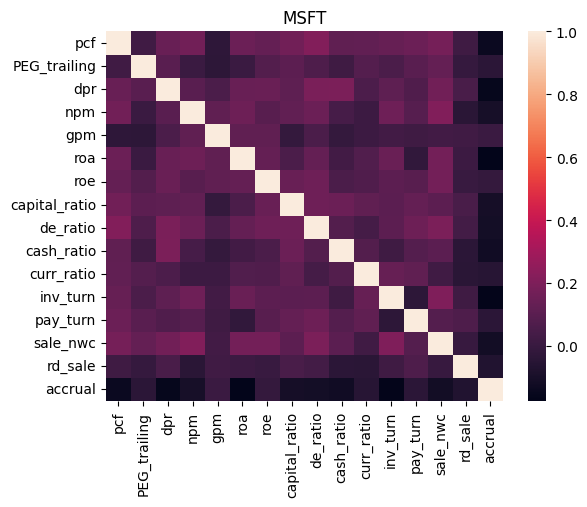

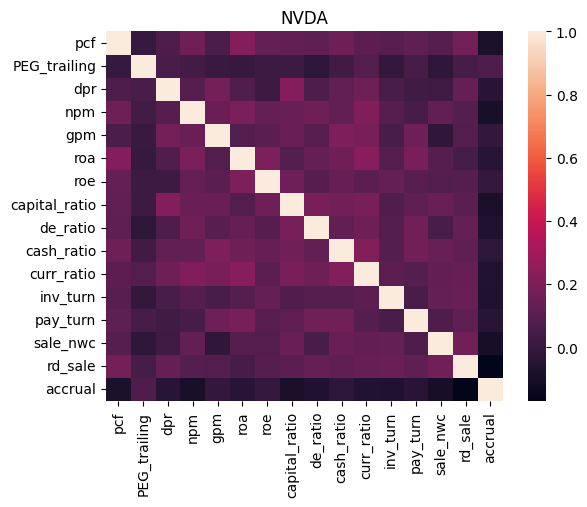

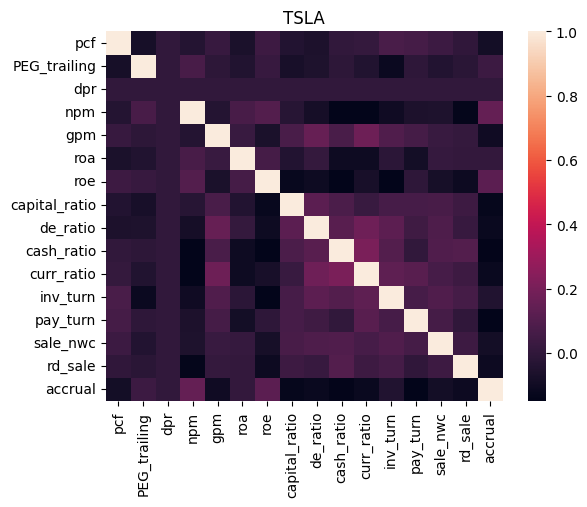

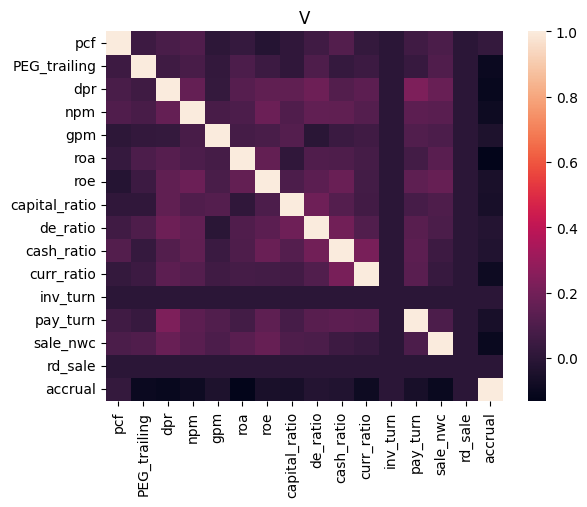

In [58]:
freq = 'Weekly'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()

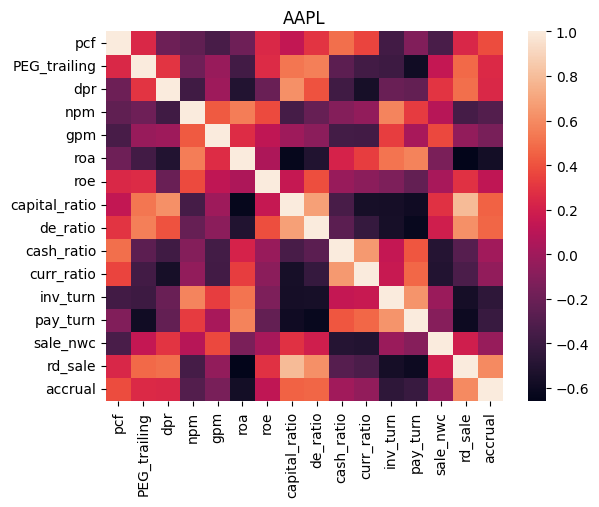

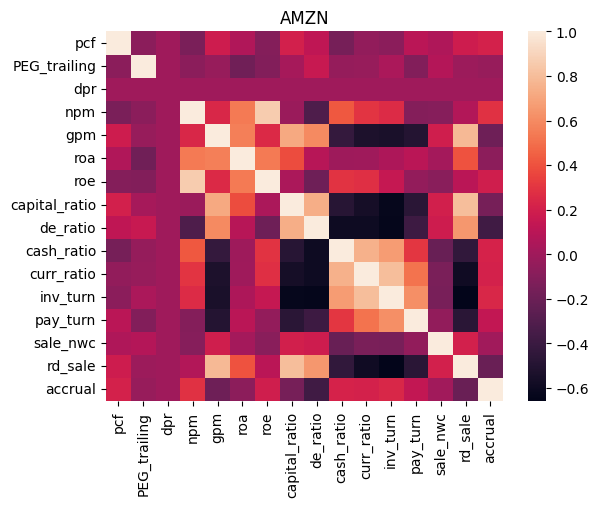

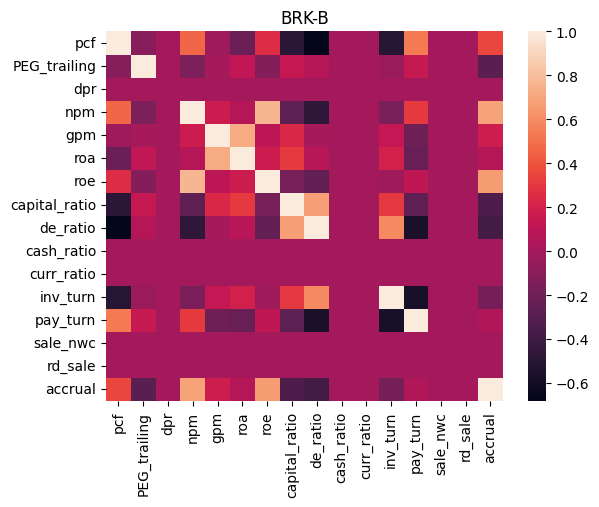

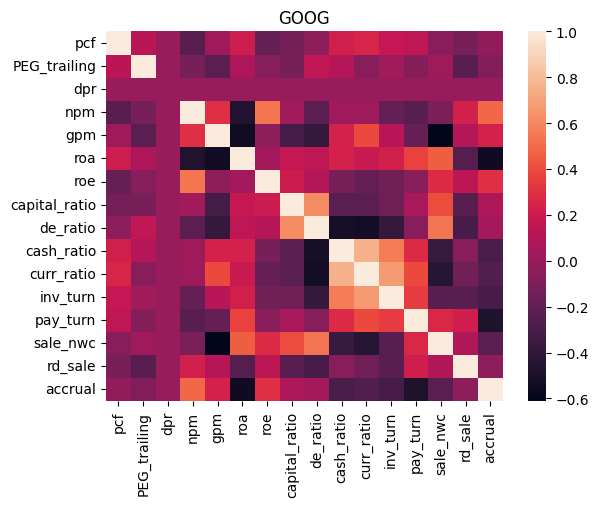

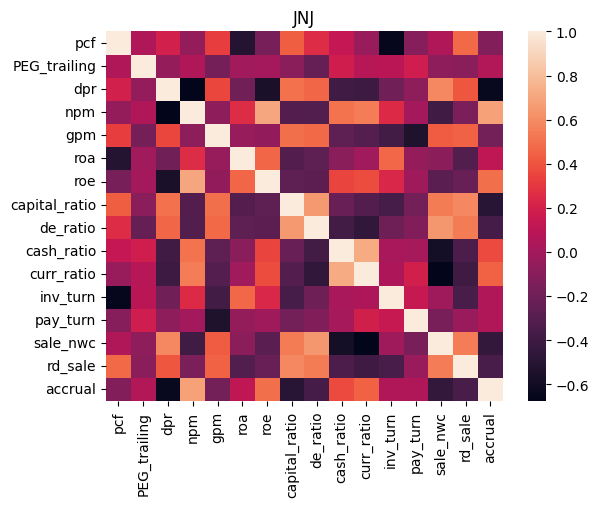

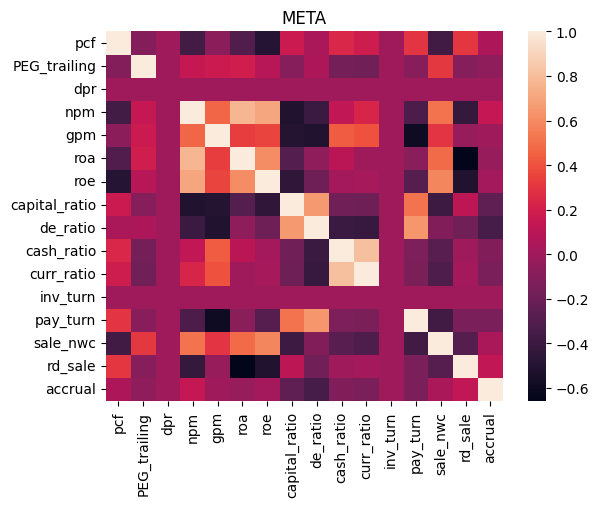

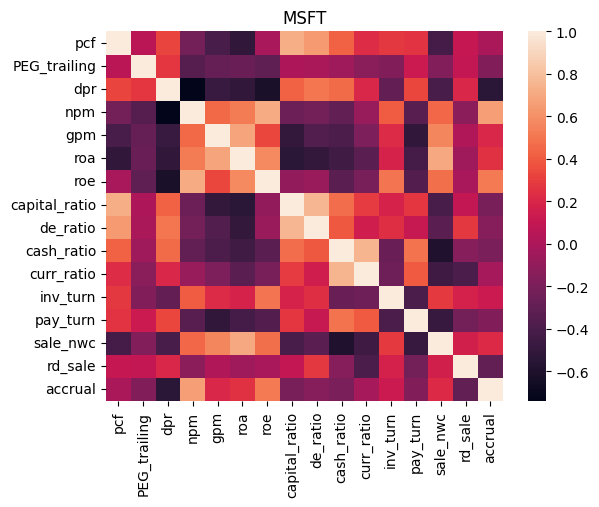

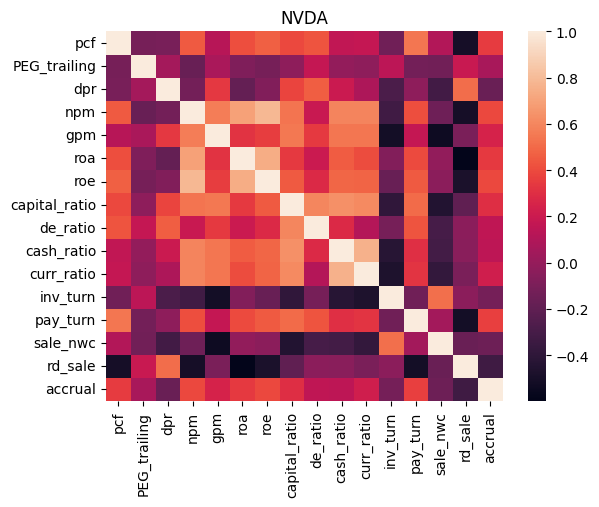

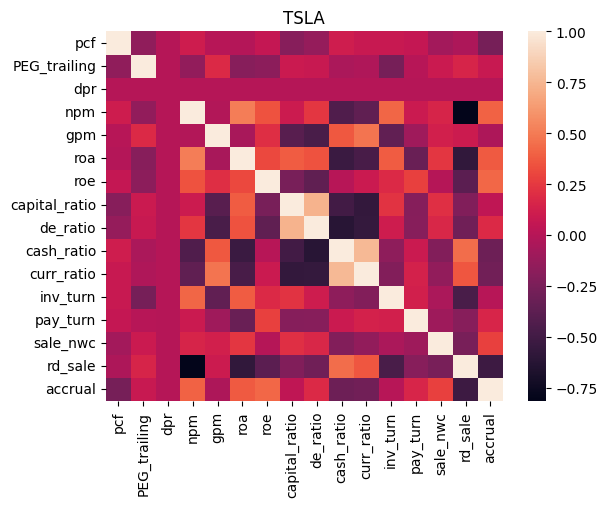

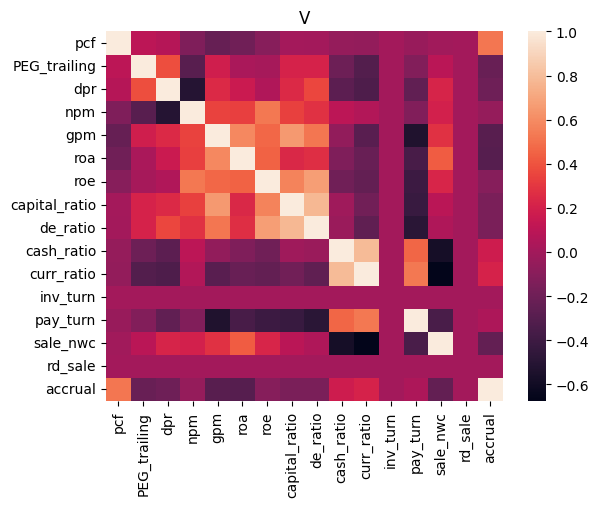

In [59]:
freq = 'Monthly'

for name in stock_list:
    FundaInd = pd.read_csv('FundaIndicators/'+freq+'/'+name+'.csv')
    sns.heatmap(FundaInd.corr().fillna(0))
    plt.title(name)
    plt.show()

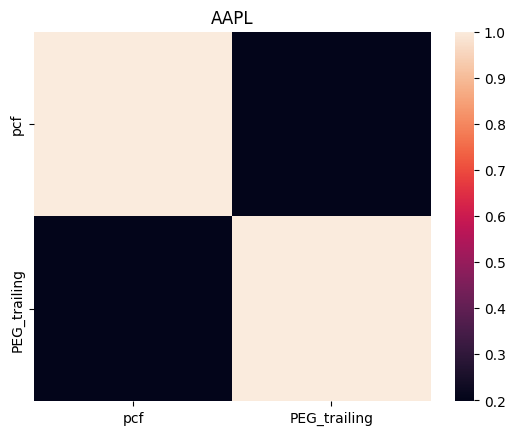

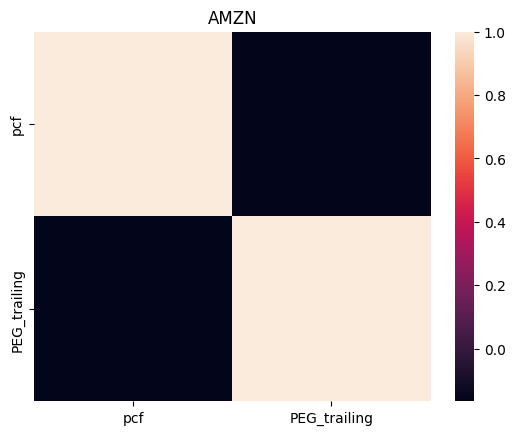

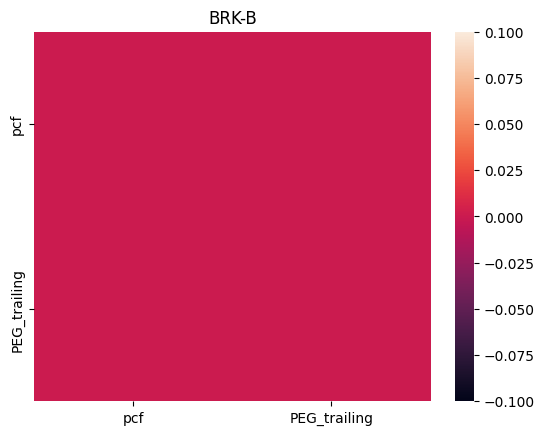

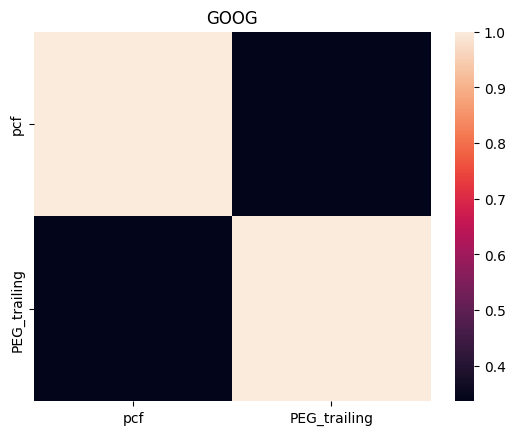

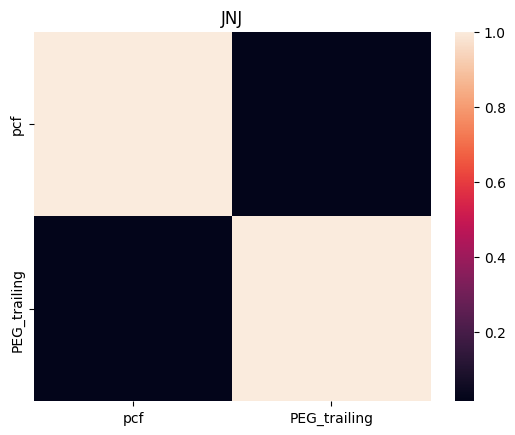

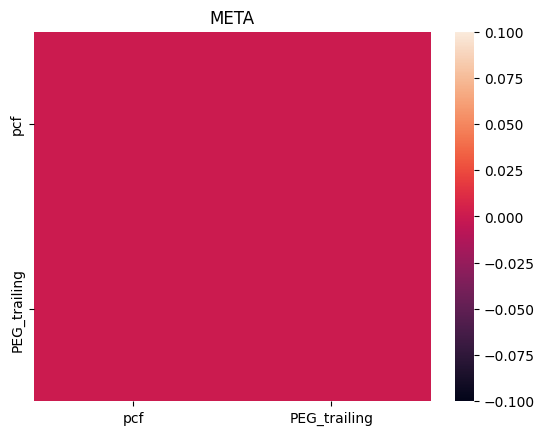

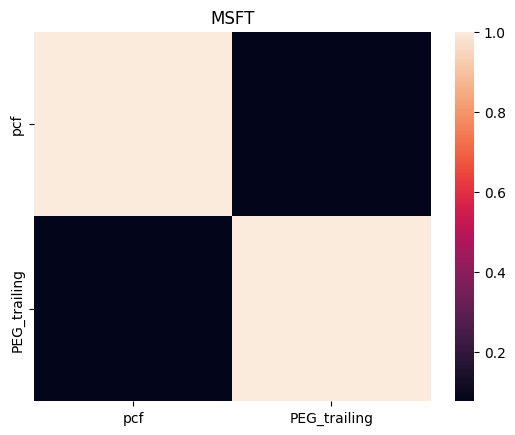

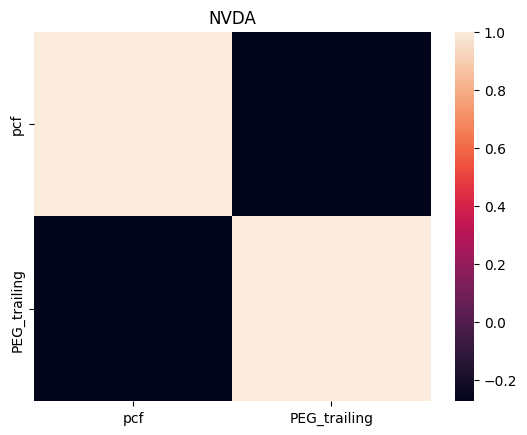

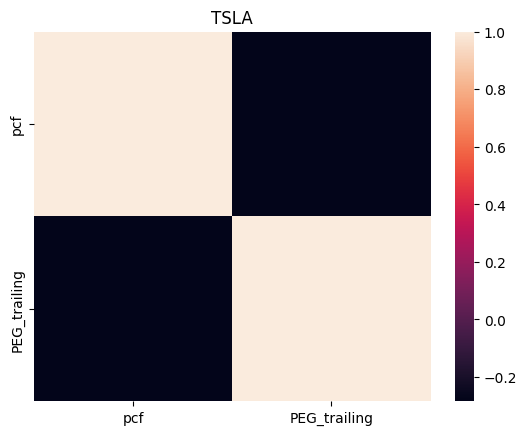

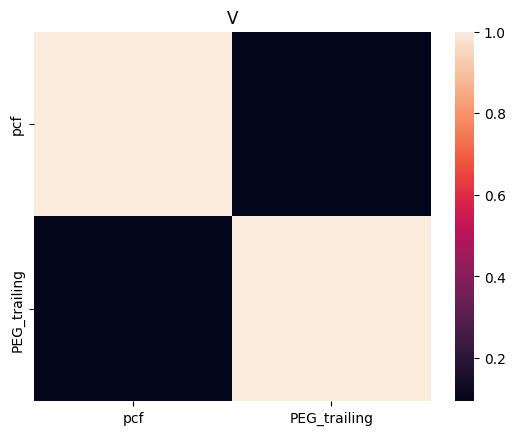

In [60]:
for s in stock_list:
    flow_stock = flow_data.loc[flow_data.TICKER == s,:]
    flow_stock['public_date'] = flow_stock.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    flow_stock.set_index('public_date')
    sns.heatmap(flow_stock.corr().fillna(0))
    plt.title(s)
    plt.show()

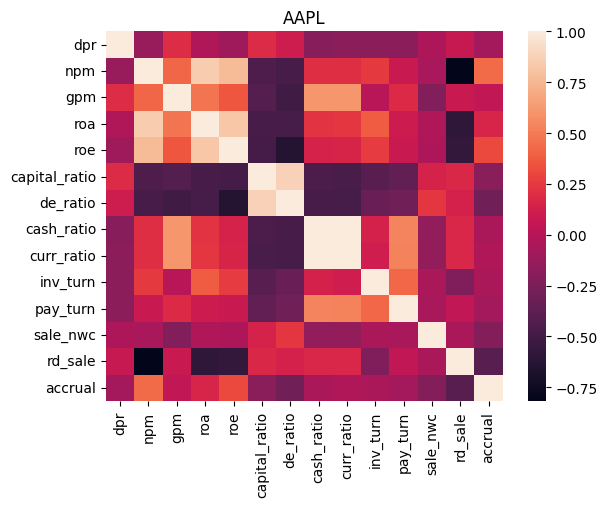

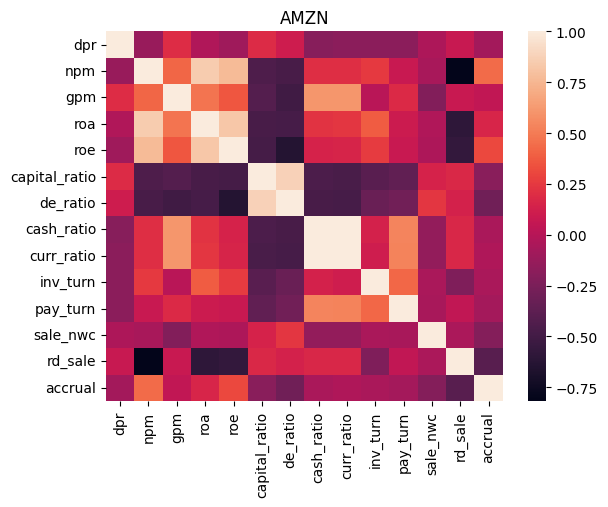

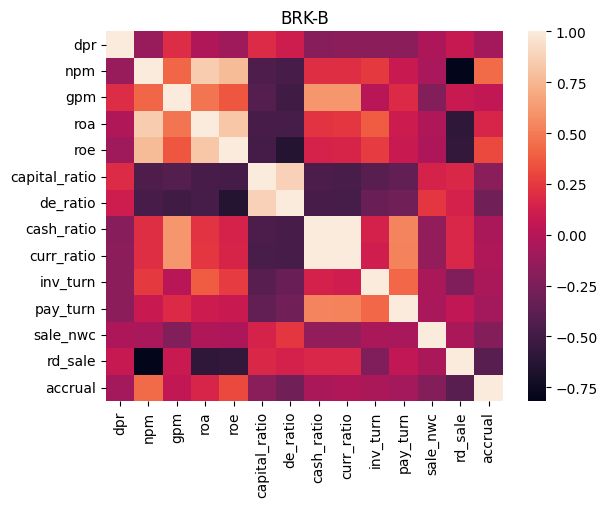

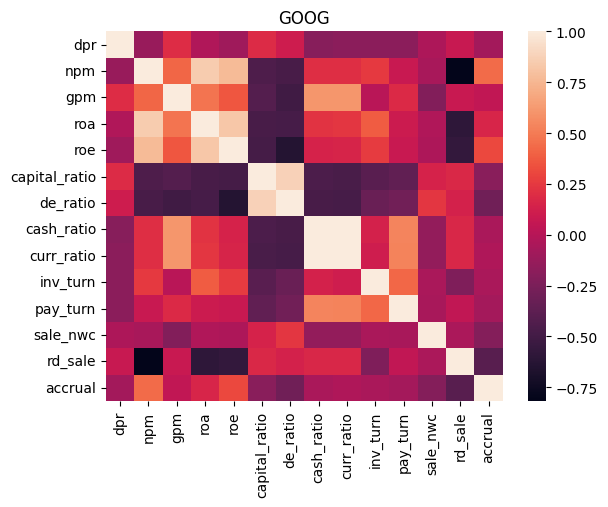

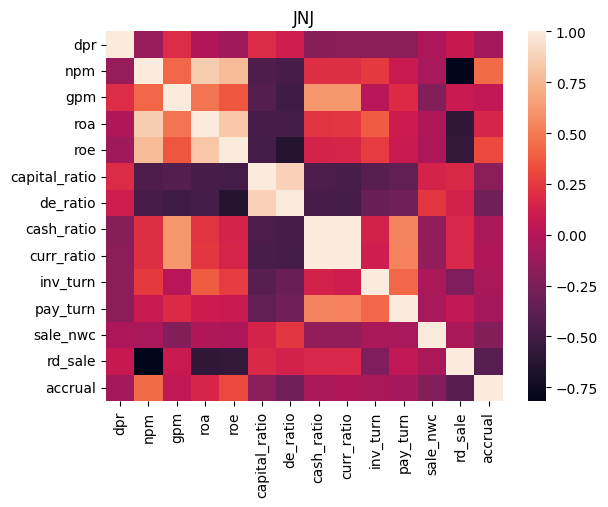

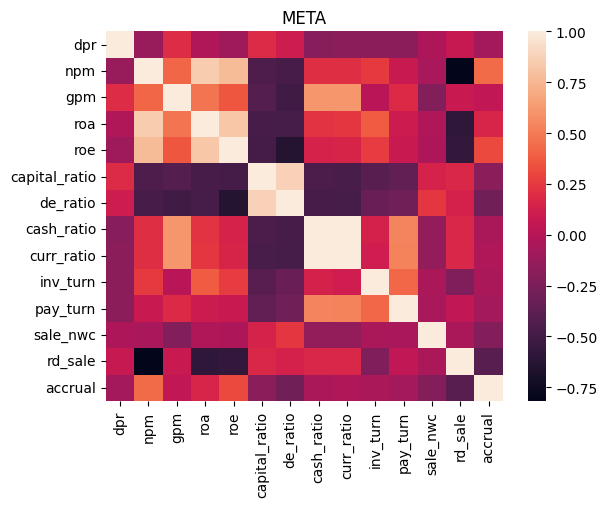

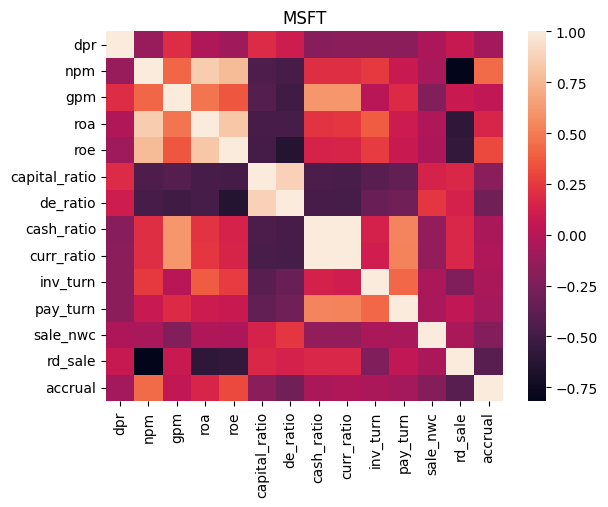

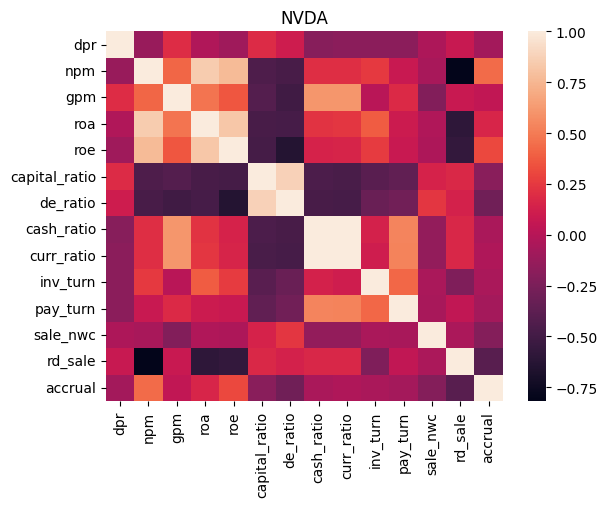

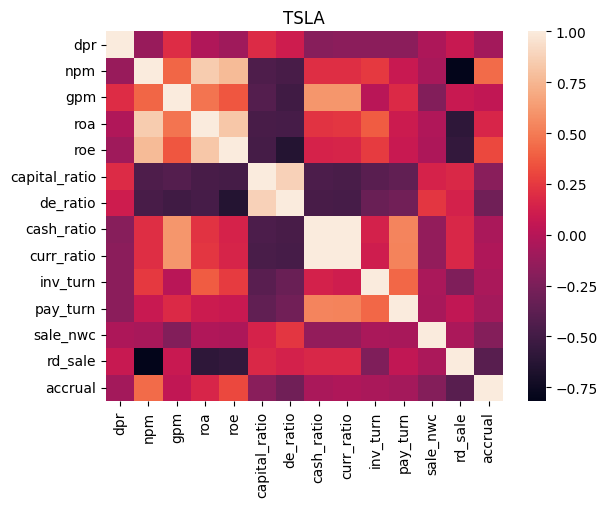

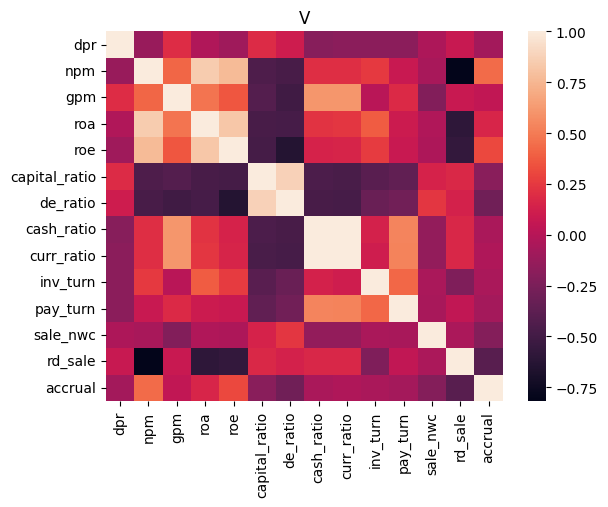

In [61]:
for s in stock_list:
    funda_stock = funda_data.loc[funda_data.TICKER == s,:]
    funda_stock['public_date'] = funda_data.public_date.apply(lambda x:dt.datetime.strptime(x,'%m/%d/%Y'))
    funda_stock.set_index('public_date')
    sns.heatmap(funda_data.corr().fillna(0))
    plt.title(s)
    plt.show()